In [1]:
import numpy as np

import math

import pandas as pd

from scipy.optimize import curve_fit

In [2]:
data=pd.read_csv("~/Downloads/Default_Dataset.csv", header=-1)

data_set=data.to_numpy()

In [3]:
diameter_fiber = 5 * (10**(-9.0))

area_fiber = math.pi * (diameter_fiber/2.0) * (diameter_fiber/2.0)

strain = data_set[:,0]/100.0 # adimensional

stress = data_set[:,1]  # in Mpa

force = stress * area_fiber * (1e6) # in N

In [4]:
print force [35]

print stress[35]

print area_fiber

print strain[35]

6.352485145126419e-09
323.5294117647058
1.96349540849e-17
0.9662958959517417


In [5]:
def quartic_fit(x, B1, B2, K):
    diameter_fiber = 5 * (10**(-9.0))

    area_fiber = math.pi * (diameter_fiber/2.0) * (diameter_fiber/2.0)
    
    Rc = 0.97 
    #K  = 1.0/area_fiber 

    
    dr = x - Rc
    r2 = dr * dr
    ra = x - B1
    rb = x - B2
    
    return K * (r2 * (ra + rb) + 2.0 * dr * ra * rb)

In [36]:
params, params_covariance = curve_fit(quartic_fit, strain, stress, p0=[-0.55,0.25,1000])

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

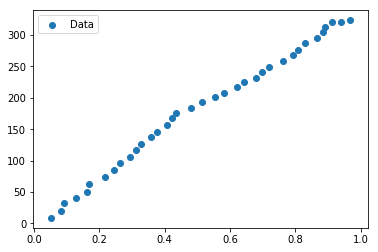

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(strain, stress, label='Data')
#plt.plot(strain, quartic_fit(strain, params[0], params[1], params[2]),label='Fitted function')

plt.legend(loc='best')

plt.show()